# Exercise project 2 – ANN for Classification (Aviation dataset)

In this project, I used an airline dataset with over 129,000 instancess to build a multi-class classifier predicting travel class (Economy, Premium Economy, Business) based on various booking, demographic, and travel-related features. The dataset was messy, large, and class-imbalanced, so it required a lot of cleaning and balancing before training the model.

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

### Step 0: Importing libraries and loading the dataset

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tqdm.keras import TqdmCallback

# For Google Colab GUI
import ipywidgets as widgets
from IPython.display import display

In [ ]:
folder_path = '/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_2/'
os.chdir(folder_path)

In [ ]:
df_train = pd.read_csv('data/aviation_train.csv')
df_test = pd.read_csv('data/aviation_test.csv')
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

### Step 1: Data analysis and visualisations

Here, I saw that there were 25 columns, which I found a bit excessive

In [ ]:
print("Data shape:", df.shape)
df.head()

Data shape: (129880, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Step 2: Data pre-processing

In [ ]:
columns_to_drop = ['Unnamed: 0', 'id']
df = df.drop(columns=columns_to_drop)

In [ ]:
print("Unique values in 'class' column:", df['Class'].unique())
print("Unique values in 'type of travel' column:", df['Type of Travel'].unique())

Unique values in 'class' column: ['Eco Plus' 'Business' 'Eco']
Unique values in 'type of travel' column: ['Personal Travel' 'Business travel']


In [ ]:
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns found in the data:")
for col in non_numeric_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Categorical columns found in the data:
Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Customer Type': ['Loyal Customer' 'disloyal Customer']
Unique values in 'Type of Travel': ['Personal Travel' 'Business travel']
Unique values in 'Class': ['Eco Plus' 'Business' 'Eco']
Unique values in 'satisfaction': ['neutral or dissatisfied' 'satisfied']


In [ ]:
df = df.dropna()

Encoding non-numeric features

In [ ]:
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print("\nEncoding mappings for all categorical columns:")
for col, mapping in label_encoders.items():
    print(f"{col}: {mapping}")


Encoding mappings for all categorical columns:
Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Customer Type: {'Loyal Customer': np.int64(0), 'disloyal Customer': np.int64(1)}
Type of Travel: {'Business travel': np.int64(0), 'Personal Travel': np.int64(1)}
Class: {'Business': np.int64(0), 'Eco': np.int64(1), 'Eco Plus': np.int64(2)}
satisfaction: {'neutral or dissatisfied': np.int64(0), 'satisfied': np.int64(1)}


Correlation Matrix to select relevant features

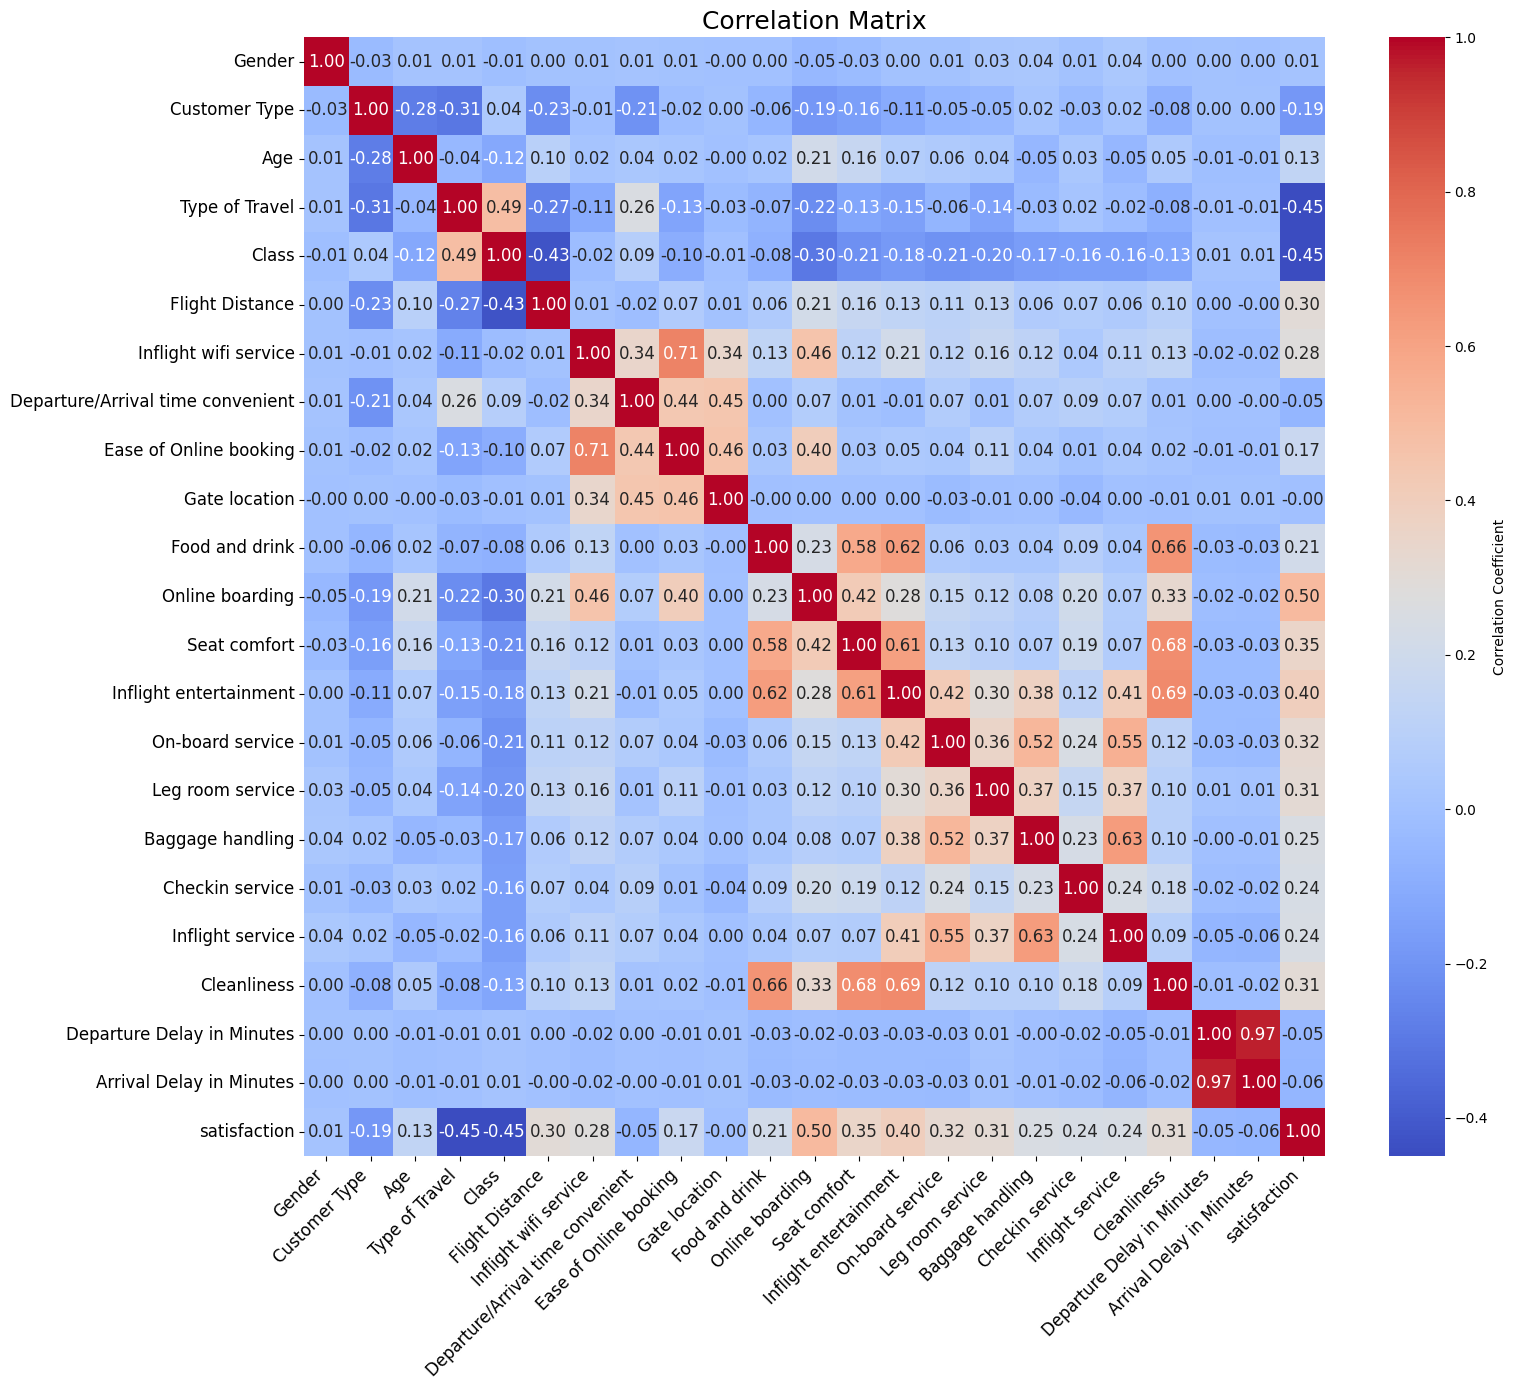

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 12}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

correlations with the target column 'Class'

In [ ]:
if 'Class' in corr_matrix.columns:
    class_corr = corr_matrix['Class'].drop('Class')
    strong_corrs = class_corr[abs(class_corr) > 0.1]
    print("\nColumns with correlation > |0.1| with 'Class':")
    print(strong_corrs.sort_values(ascending=False))
else:
    print("Column 'Class' not found in correlation matrix.")


Columns with correlation > |0.1| with 'Class':
Type of Travel            0.486718
Age                      -0.116921
Cleanliness              -0.129623
Checkin service          -0.157494
Inflight service         -0.159285
Baggage handling         -0.166588
Inflight entertainment   -0.183162
Leg room service         -0.198825
On-board service         -0.210649
Seat comfort             -0.212334
Online boarding          -0.297645
Flight Distance          -0.426925
satisfaction             -0.448193
Name: Class, dtype: float64


In [ ]:
# relevant columns to keep
cols_to_keep = [
    'Type of Travel', 'Age', 'Cleanliness', 'Checkin service', 'Inflight service',
    'Baggage handling', 'Inflight entertainment', 'Leg room service',
    'On-board service', 'Seat comfort', 'Online boarding',
    'Flight Distance', 'satisfaction', 'Class'
]

# keep only these columns in the DataFrame
df = df[cols_to_keep]
df.head(5)

,Type of Travel,Age,Cleanliness,Checkin service,Inflight service,Baggage handling,Inflight entertainment,Leg room service,On-board service,Seat comfort,Online boarding,Flight Distance,satisfaction,Class
0,1,13,5,4,5,4,5,3,4,5,3,460,0,2
1,0,25,1,1,4,3,1,5,1,1,3,235,0,0
2,0,26,5,4,4,4,5,3,4,5,5,1142,1,0
3,0,25,2,1,4,3,2,5,2,2,2,562,0,0
4,0,61,3,3,3,4,3,4,3,5,5,214,1,0


In [ ]:
# Show min and max values for each column
print("\nMin and Max values for each column:")
for col in df.columns:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: min = {min_val}, max = {max_val}")


Min and Max values for each column:
Type of Travel: min = 0, max = 1
Age: min = 7, max = 85
Cleanliness: min = 0, max = 5
Checkin service: min = 0, max = 5
Inflight service: min = 0, max = 5
Baggage handling: min = 1, max = 5
Inflight entertainment: min = 0, max = 5
Leg room service: min = 0, max = 5
On-board service: min = 0, max = 5
Seat comfort: min = 0, max = 5
Online boarding: min = 0, max = 5
Flight Distance: min = 31, max = 4983
satisfaction: min = 0, max = 1
Class: min = 0, max = 2


Selecting Class as the target column

In [ ]:
target_column = 'Class'
X = df.drop(columns=[target_column])
y = df[target_column]

Scaling numeric features using MinMaxScaler. I excluded non-numeric encoded columns. Even though these are now numeric, we should not scale them if they represent categories, as far as I understand

In [ ]:
non_numeric_columns = ['Type of Travel', 'satisfaction']  # Binary/categorical features NOT SCALED
numeric_columns_to_scale = X.select_dtypes(include=['float64', 'int64']).columns.difference(non_numeric_columns)

X[numeric_columns_to_scale] = X[numeric_columns_to_scale].astype('float64')
scaler = MinMaxScaler()
X.loc[:, numeric_columns_to_scale] = scaler.fit_transform(X[numeric_columns_to_scale])
print("\nSample scaled features:")
X.head()


Sample scaled features:


,Type of Travel,Age,Cleanliness,Checkin service,Inflight service,Baggage handling,Inflight entertainment,Leg room service,On-board service,Seat comfort,Online boarding,Flight Distance,satisfaction
0,1,0.076923,1.0,0.8,1.0,0.75,1.0,0.6,0.8,1.0,0.6,0.086632,0
1,0,0.230769,0.2,0.2,0.8,0.50,0.2,1.0,0.2,0.2,0.6,0.041195,0
2,0,0.243590,1.0,0.8,0.8,0.75,1.0,0.6,0.8,1.0,1.0,0.224354,1
3,0,0.230769,0.4,0.2,0.8,0.50,0.4,1.0,0.4,0.4,0.4,0.107229,0
4,0,0.692308,0.6,0.6,0.6,0.75,0.6,0.8,0.6,1.0,1.0,0.036955,1


Split the data with an 80/20 ratio, 20% should be enough, as I will also be testing with my own values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inspecting the distribution of instances per class

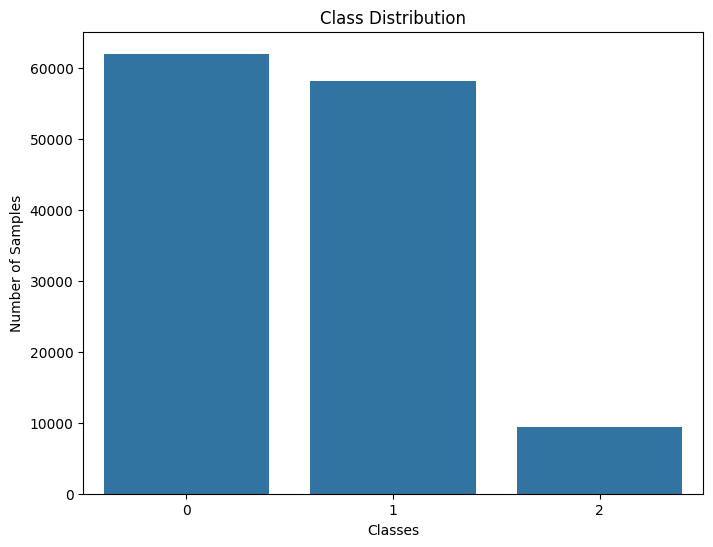

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.show()

Here, I applied SMOTE to balance the training df, but my model wasn't training so I decided to not deal with the imbalance.

In [ ]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Step 3: Model Architecture

In [ ]:
input_shape = X.shape[1]
num_classes = y.nunique()
print("Input shape:", input_shape)
print("Number of classes:", num_classes)

Input shape: 13
Number of classes: 3


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
])
# I used "sparse categorical cross-entropy loss" since the target is encoded as integers
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,227 (47.76 KB)

 Trainable params: 12,227 (47.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=150,
                    validation_split=0.1,
                    callbacks=[(TqdmCallback(verbose=1)),early_stopping, reduce_lr],
                    verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

### Step 4: Model Evaluation

Training Visualisations (Loss / Accuracy)

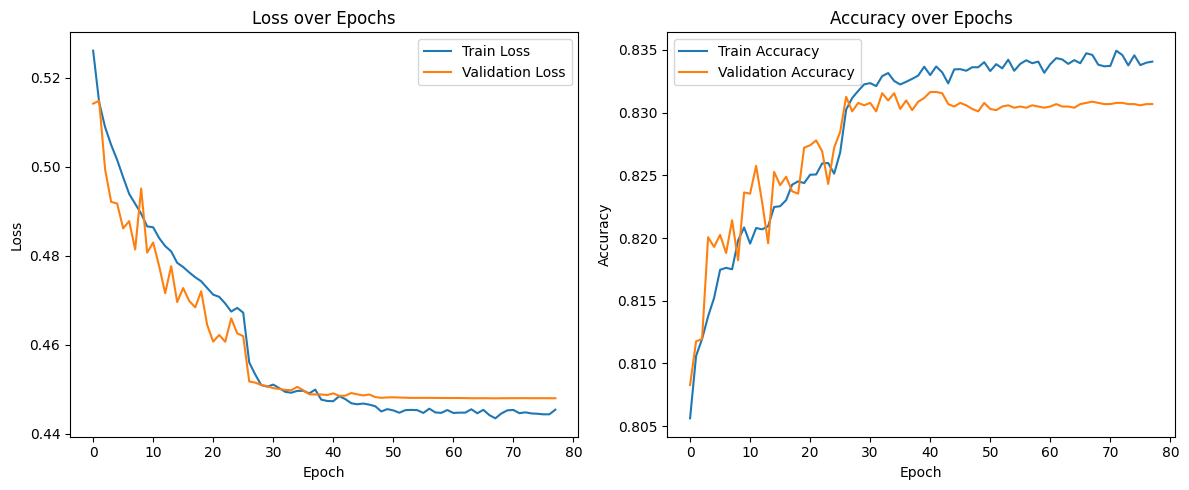

In [ ]:
# Training Visualization
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Decoding labels
if 'Class' in label_encoders:
    class_decoder = {v: k for k, v in label_encoders['Class'].items()}
    y_test_decoded = [class_decoder[val] for val in y_test]
    y_pred_decoded = [class_decoder[val] for val in y_pred]
else:
    y_test_decoded = y_test
    y_pred_decoded = y_pred

Confusion Matrix

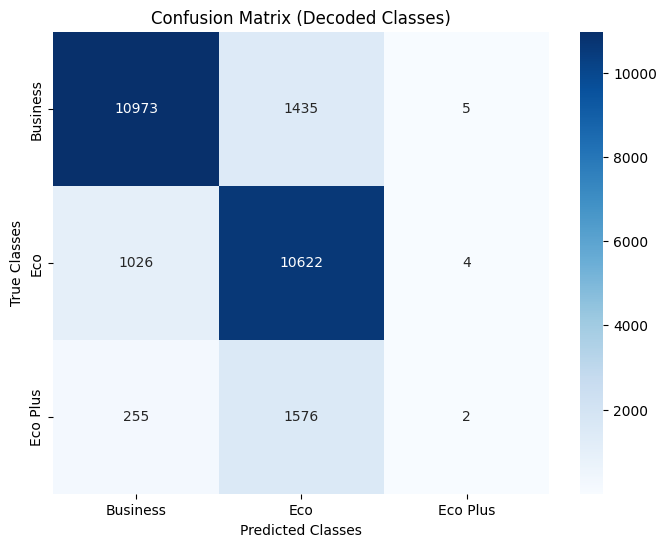

In [ ]:
cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=list(class_decoder.values()))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(class_decoder.values()),
            yticklabels=list(class_decoder.values()))
plt.title("Confusion Matrix (Decoded Classes)")
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     12413
           1       0.78      0.91      0.84     11652
           2       0.18      0.00      0.00      1833

    accuracy                           0.83     25898
   macro avg       0.62      0.60      0.58     25898
weighted avg       0.79      0.83      0.80     25898



In [ ]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.8740458884423391


### Step 5: Predictions

In [ ]:
# New sample input with encoded values
new_sample = pd.DataFrame({
    'Type of Travel': [0],
    'Age': [35],
    'Cleanliness': [4],
    'Checkin service': [3],
    'Inflight service': [4],
    'Baggage handling': [3],
    'Inflight entertainment': [2],
    'Leg room service': [3],
    'On-board service': [4],
    'Seat comfort': [3],
    'Online boarding': [4],
    'Flight Distance': [1200],
    'satisfaction': [1]
})

# Reorder columns to match X
new_sample = new_sample.reindex(columns=X.columns)

# Explicitly cast numeric_columns_to_scale to float64 using a dict comprehension
cast_dict = {col: 'float64' for col in numeric_columns_to_scale}
new_sample = new_sample.astype(cast_dict)

# Scale the numeric columns
new_sample_scaled = new_sample.copy()
new_sample_scaled.loc[:, numeric_columns_to_scale] = scaler.transform(new_sample_scaled.loc[:, numeric_columns_to_scale])

# Make prediction and decode the predicted label
new_prediction = model.predict(new_sample_scaled)
predicted_class = np.argmax(new_prediction, axis=1)[0]
reverse_mapping = {v: k for k, v in label_encoders['Class'].items()}
decoded_class = reverse_mapping[predicted_class]
print("Predicted Class for new sample:", decoded_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class for new sample: Business


### Personal Analysis / Refelection

I spent a long time cleaning up the messy dataset and wrestling with various methods to make it work. I started with over 129,000 rows and 25 columns, which meant lots of cleaning, encoding, and balancing. I even tried SMOTE to address the class imbalance, but it ended up distorting the data distribution and making the training less stable. I ultimately decided to rely on the original data.

I compared three models. The gradient boosting classifier reached about 83% accuracy and handled the non-linear patterns and imbalances much better. My Logistic Regression model only managed around 77% accuracy. It completely failed to predict one of the classes which showed up with zero precision and recall for that label. My neural network was designed with multiple dense layers, dropout, early stopping, and a learning rate reducer, and it performed similarly to gradient boosting with roughly 83% accuracy and a ROC-AUC of 0.87. The poor performance was due to the imbalance in teh classes, but when I realized this I invested way too much time into the Notebook to just throw it out.

In short, I learned that this dataset has complex, non-linear relationships that simple models like Logistic Regression cannot capture well. The advanced models, like gradient boosting and the neural network, handled the data much better.

### EXTRA: Predictions with a simple GUI

In [ ]:
type_of_travel = widgets.Dropdown(
    options=[('Business travel', 0), ('Personal Travel', 1)],
    description='Travel Type:'
)
age = widgets.BoundedIntText(
    value=30,
    min=7,
    max=85,
    description='Age:'
)
cleanliness = widgets.IntSlider(
    value=3,
    min=0,
    max=5,
    description='Cleanliness'
)
checkin_service = widgets.IntSlider(
    value=3,
    min=0,
    max=5,
    description='Check-in'
)
inflight_service = widgets.IntSlider(
    value=3,
    min=0,
    max=5,
    description='Inflight'
)
baggage_handling = widgets.IntSlider(
    value=3,
    min=1,
    max=5,
    description='Baggage'
)
inflight_entertainment = widgets.IntSlider(
    value=3,
    min=0,
    max=5,
    description='Entertainment'
)
legroom = widgets.IntSlider(
    value=3,
    min=0,
    max=5,
    description='Legroom'
)
onboard_service = widgets.IntSlider(
    value=3,
    min=0,
    max=5,
    description='On-board'
)
seat_comfort = widgets.IntSlider(
    value=3,
    min=0,
    max=5,
    description='Seat'
)
online_boarding = widgets.IntSlider(
    value=3,
    min=0,
    max=5,
    description='Online'
)
flight_distance = widgets.BoundedIntText(
    value=500,
    min=31,
    max=4983,
    description='Distance:'
)
satisfaction = widgets.Dropdown(
    options=[('neutral or dissatisfied', 0), ('satisfied', 1)],
    description='Satisfaction:'
)
predict_button = widgets.Button(description="Predict Class")
output = widgets.Output()

# Callback function to process inputs and make prediction
def predict_class(b):
    input_data = np.array([[
        type_of_travel.value,
        age.value,
        cleanliness.value,
        checkin_service.value,
        inflight_service.value,
        baggage_handling.value,
        inflight_entertainment.value,
        legroom.value,
        onboard_service.value,
        seat_comfort.value,
        online_boarding.value,
        flight_distance.value,
        satisfaction.value
    ]])
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction, axis=1)[0]
    reverse_mapping = {v: k for k, v in label_encoders['Class'].items()}
    decoded_class = reverse_mapping[predicted_class]
    with output:
        output.clear_output()
        print(f"Predicted Class: {decoded_class}")

predict_button.on_click(predict_class)

# Display the GUI
display(widgets.VBox([
    type_of_travel, age, cleanliness, checkin_service, inflight_service,
    baggage_handling, inflight_entertainment, legroom, onboard_service,
    seat_comfort, online_boarding, flight_distance, satisfaction,
    predict_button, output
]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


###  EXTRA: Classification with Logistic Regression and  using HistGradientBoostingClassifier

In [ ]:
# HistGradientBoostingClassifier
reference_model = HistGradientBoostingClassifier()
reference_model.fit(X_train_final, y_train_final)
ref_score = reference_model.score(X_test, y_test)
print("Reference model test set score (HistGradientBoostingClassifier):", ref_score)

Reference model test set score (HistGradientBoostingClassifier): 0.8317244574870646


In [ ]:
# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)

# Generate predictions and prediction probabilities for the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_probs_lr = lr_model.predict_proba(X_test)

Confusion Matrix

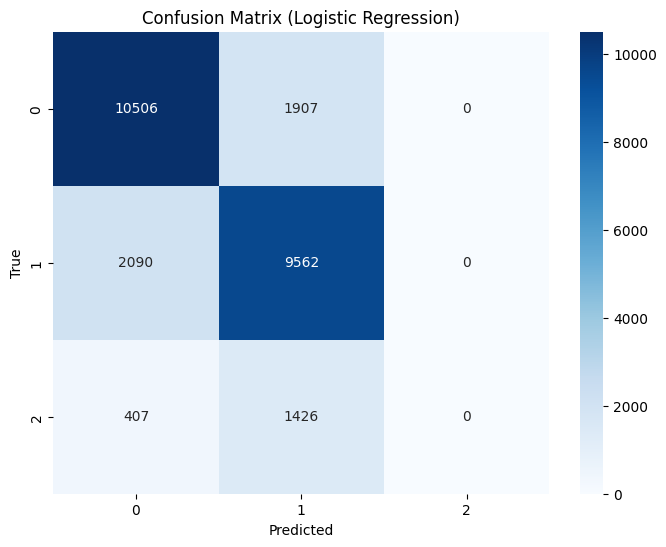

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Classification report

In [ ]:
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, zero_division=0))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     12413
           1       0.74      0.82      0.78     11652
           2       0.00      0.00      0.00      1833

    accuracy                           0.77     25898
   macro avg       0.52      0.56      0.54     25898
weighted avg       0.72      0.77      0.75     25898



In [ ]:
# Calculate and print accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression):", accuracy_lr)

Accuracy (Logistic Regression): 0.7748860915900841


In [ ]:
# Calculate and print ROC-AUC score (for multi-class problem using OvR)
roc_auc_lr = roc_auc_score(y_test, y_pred_probs_lr, multi_class='ovr')
print("ROC-AUC Score (Logistic Regression):", roc_auc_lr)

ROC-AUC Score (Logistic Regression): 0.8245884986551878
